In [1]:
from pathlib import Path
from tokenizer.BPE import Tokenizer

In [2]:
%%time

t = Tokenizer(compute_vocab=False, 
              max_vocab_size=370,
              corpus_source='wmt',
              vocab_dest_file=Path('./data/dest/wmt_37k_tokens.yaml'))

CPU times: user 2.15 s, sys: 42.1 ms, total: 2.19 s
Wall time: 2.2 s


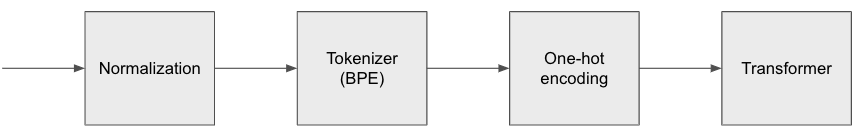

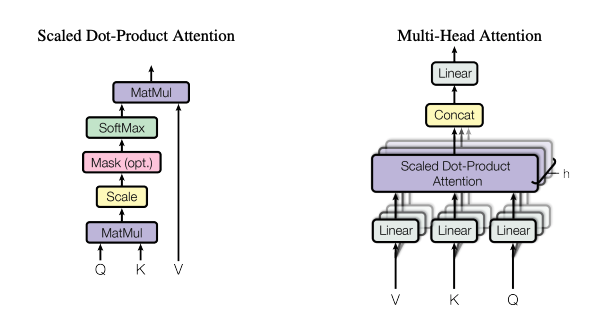

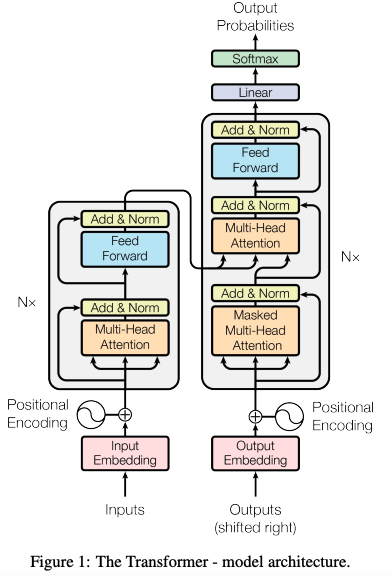